In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv("/content/drive/My Drive/Placement_Data_Full_Class.csv")

In [0]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [0]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [0]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [0]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [0]:
data['salary'].min()

200000.0

In [0]:
data['salary'] = data['salary'].fillna(200000.0)

In [0]:
df = data.drop(['status'],axis = 1)

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
#gender
le.fit(df.gender.drop_duplicates())
df.gender = le.transform(df.gender)

#ssc_b
le.fit(df.ssc_b.drop_duplicates())
df.ssc_b = le.transform(df.ssc_b)

#hsc_b
le.fit(df.hsc_b.drop_duplicates())
df.hsc_b = le.transform(df.hsc_b)

#hsc_s
le.fit(df.hsc_s.drop_duplicates())
df.hsc_s = le.transform(df.hsc_s)

#degree_t
le.fit(df.degree_t.drop_duplicates())
df.degree_t = le.transform(df.degree_t)

#workex
le.fit(df.workex.drop_duplicates())
df.workex = le.transform(df.workex)

#specialisation
le.fit(df.specialisation.drop_duplicates())
df.specialisation = le.transform(df.specialisation)

In [0]:
df.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
salary            float64
dtype: object

In [0]:
df = df.drop(['sl_no'],axis = 1)

In [0]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,261027.906977
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,87713.473441
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,200000.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,200000.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,240000.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,282500.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,940000.000000


In [0]:
corr = df.corr()

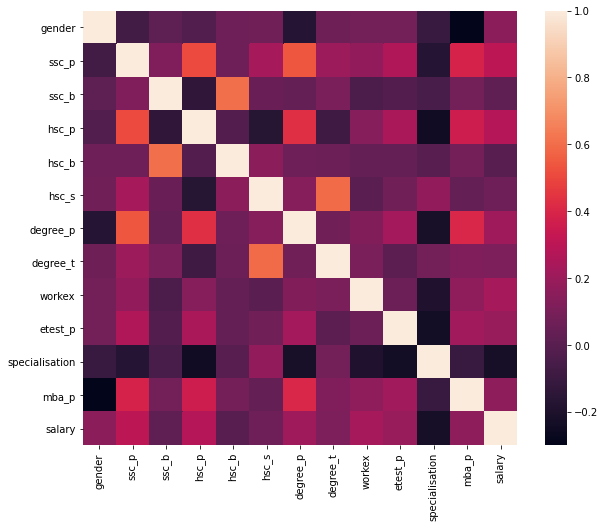

In [0]:
f,ax = plt.subplots(figsize=(10,8))

sns.heatmap(corr,square=True,ax = ax)

In [0]:
df.corr()['salary'].sort_values()

specialisation   -0.221295
hsc_b             0.002434
ssc_b             0.021566
hsc_s             0.068661
degree_t          0.115342
gender            0.156557
mba_p             0.165310
etest_p           0.194851
degree_p          0.212669
workex            0.234140
hsc_p             0.278629
ssc_p             0.306051
salary            1.000000
Name: salary, dtype: float64

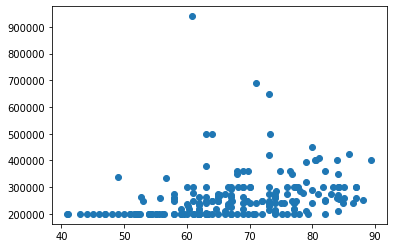

In [0]:
plt.scatter(x = df['ssc_p'],y=df['salary'])

In [0]:
df = df.drop(['hsc_b','ssc_b','hsc_s'],axis=1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
x = df[['ssc_p','hsc_p']]
y = df['mba_p']

quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x_quad,y,test_size = 0.2,random_state=0)



lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))
print(mean_squared_error(y_test_pred,y_test))
print(r2_score(y_test_pred,y_test))


0.20669415918288156
24.452685387954382
-1.6071737349196487


In [0]:
mlr_df = pd.concat([x,y],axis=1)

In [0]:
mlr_df.head()

,ssc_p,hsc_p,mba_p
0,67.00,91.00,58.80
1,79.33,78.33,66.28
2,65.00,68.00,57.80
3,56.00,52.00,59.43
4,85.80,73.60,55.50


In [0]:
mlr_df.corr()['mba_p'].sort_values()

hsc_p    0.354823
ssc_p    0.388478
mba_p    1.000000
Name: mba_p, dtype: float64

In [0]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [0]:
result_df.head()

,Actual,Predicted
198,71.96,62.052487
37,55.47,65.318134
89,62.36,66.666947
168,58.79,58.418057
171,66.04,66.139044
